In [ ]:
#https://www.kaggle.com/chaman7/census-income-prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.shape

(32560, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().values.any()

False

In [11]:
df.isin(['?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
df = df.replace('?', np.NaN)

In [13]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

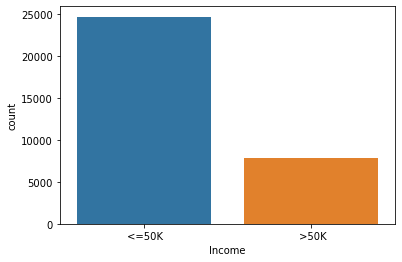

In [17]:
sns.countplot(x='Income', data = df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

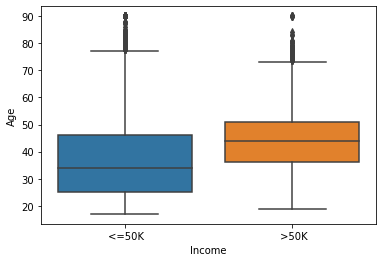

In [18]:
sns.boxplot(y='Age',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

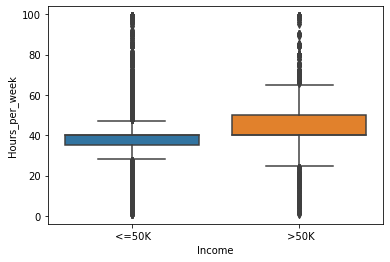

In [19]:
sns.boxplot(y='Hours_per_week',x='Income',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

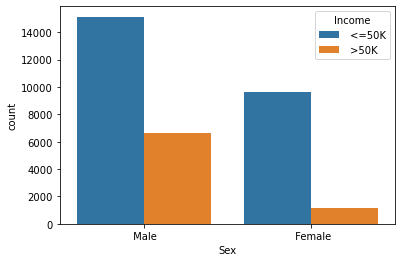

In [20]:
sns.countplot(df['Sex'],hue=df['Income'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

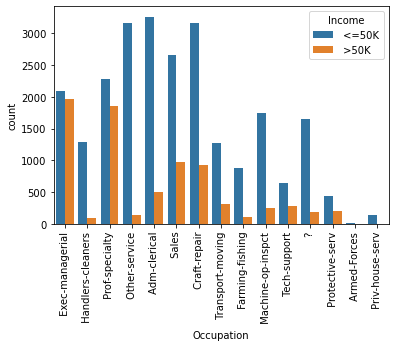

In [21]:
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=90)

In [52]:
#Feature Engineering
print('Workclass',df.Workclass.unique())
print('Education',df.Education.unique())
print('Marital_status',df['Marital_status'].unique())
print('Occupation',df.Occupation.unique())
print('Relationship',df.Relationship.unique())
print('Race',df.Race.unique())
print('Native_country',df['Native_country'].unique())

Workclass [6 4 7 1 2 0 5 8 3]
Education [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
Marital_status [2 0 3 4 5 1 6]
Occupation [ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
Relationship [0 1 5 3 4 2]
Race [4 2 1 0 3]
Native_country [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]


In [22]:
df['Income']=df['Income'].map({'<=50K': 0, '>50K': 1})


<AxesSubplot:xlabel='Education_num', ylabel='Income'>

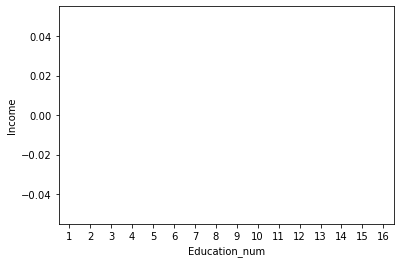

In [23]:
sns.barplot(x="Education_num",y="Income",data=df)

In [24]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

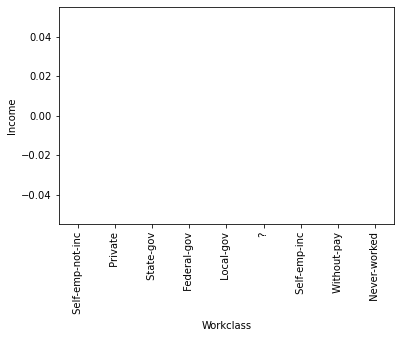

In [25]:
sns.barplot(x="Workclass",y="Income",data=df)
plt.xticks(rotation=90)

In [26]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

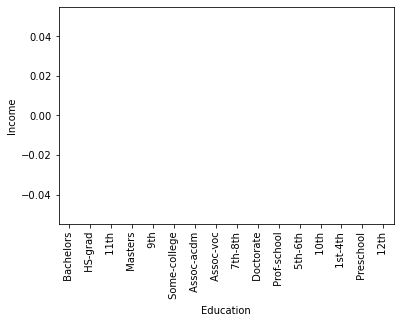

In [27]:
sns.barplot(x="Education",y="Income",data=df)
plt.xticks(rotation=90)

In [29]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

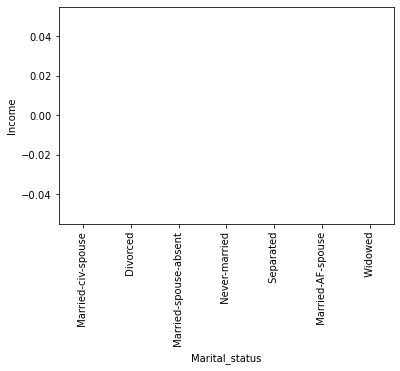

In [30]:
sns.barplot(x="Marital_status",y="Income",data=df)
plt.xticks(rotation=90)

In [31]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
sns.barplot(x="relationship",y="income",data=df)
plt.xticks(rotation=90)

In [ ]:
df['native.country'].unique()

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,NaN
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,NaN
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,NaN
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,NaN
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,NaN


<AxesSubplot:>

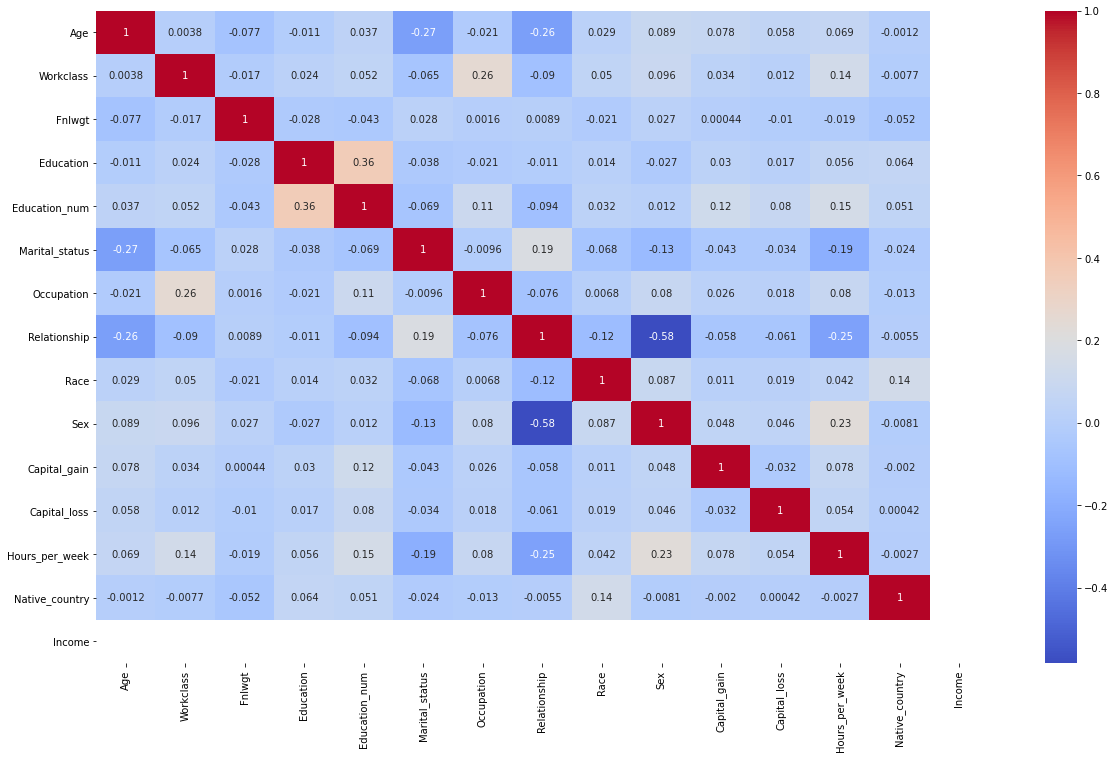

In [35]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [50]:
corrmat['Income'].sort_values(ascending = False)

Age              NaN
Workclass        NaN
Fnlwgt           NaN
Education        NaN
Education_num    NaN
Marital_status   NaN
Occupation       NaN
Relationship     NaN
Race             NaN
Sex              NaN
Capital_gain     NaN
Capital_loss     NaN
Hours_per_week   NaN
Native_country   NaN
Income           NaN
Name: Income, dtype: float64

In [37]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [40]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.477365,0.091930,5.122497,-0.332490,1.145568,0.919585,-0.605687,-0.276188,0.394002,0.701994,-0.145826,-0.218065,-0.037515,0.291727
1,-1.135011,0.091930,-1.102316,0.182397,-0.416092,0.919585,-0.842091,0.972176,-3.129446,0.701994,-0.145826,-0.218065,-3.179565,0.420218
2,-0.404293,-2.644308,-0.251371,0.182397,-0.416092,-1.737427,-1.551302,-0.276188,-3.129446,-1.424514,-0.145826,-0.218065,0.043050,-4.333955
3,1.276358,-1.960248,-0.016530,0.439841,1.535983,-1.737427,-1.314898,1.596358,0.394002,-1.424514,-0.145826,-0.218065,-0.037515,0.291727
4,0.837928,0.091930,-1.377317,-0.075046,2.316813,-0.408921,0.812737,-0.900370,0.394002,0.701994,1.933241,-0.218065,0.768139,0.291727


In [49]:
y_train.head()

21385   NaN
19749   NaN
1216    NaN
30048   NaN
23077   NaN
Name: Income, dtype: float64

In [47]:
l=[]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
y_axis=['Logistic Regression',
     'Support Vector Classifier',
        'K-Neighbors Classifier',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

NameError: name 'l' is not defined